In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import plotly.express as px


In [59]:
data = pd.read_csv("dataset/earthquake_data_tsunami.csv")
data.head(5)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [60]:
## Data type of each columns
data.dtypes

magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

In [61]:
data.describe()
## There is no missing value

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [62]:
## Checking for duplcates(no duplicated value)
data.duplicated().sum() 

np.int64(0)

### Visualization
- what is the correlation between `magnitudes` and `depth` and what implication does the two have on tsunami occurences (scatter plot with `c` as tsunami occurence)
- are tsunamis depth prone ? (box plot of `tsunami` and `depth`)
- `magnitude` distribution of earthquakes? (histogram)
- what are the interactions of all the features (`heat map` or `correlation plot`)

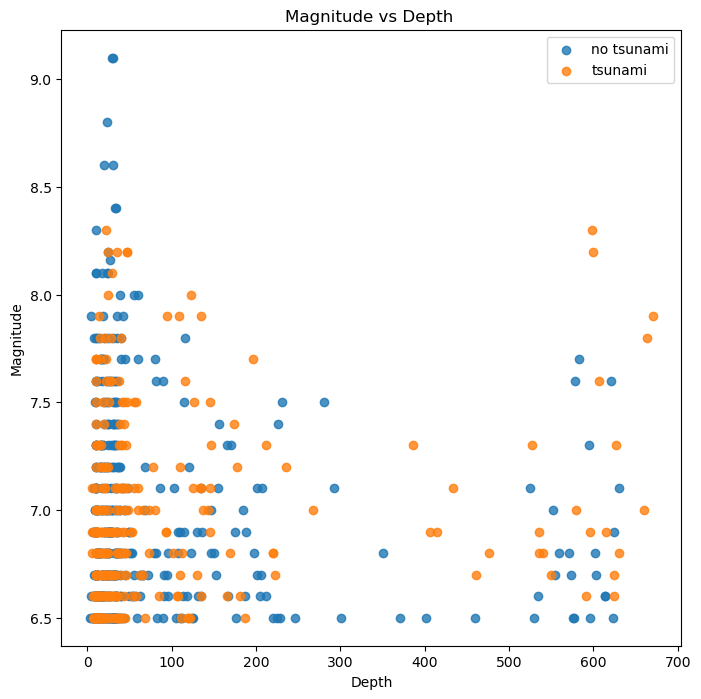

In [63]:
no_tsunami= data[data["tsunami"] ==0]
tsunami = data[data["tsunami"]==1]
plt.figure(figsize=(8,8))
plt.scatter(x=no_tsunami["depth"], y=no_tsunami["magnitude"], label="no tsunami", alpha=0.8)
plt.scatter(x=tsunami["depth"], y=tsunami["magnitude"], label="tsunami", alpha=0.8)
plt.xlabel("Depth")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Depth ")
plt.legend()


In [64]:
plot = px.scatter_geo(
    data_frame=data,
    lat="latitude",
    lon= "longitude",
    size = "magnitude",
    color="tsunami",
    projection= "natural earth",
    title = "Global eathquake-tsunami distribution"
)

plot.show()

<Axes: >

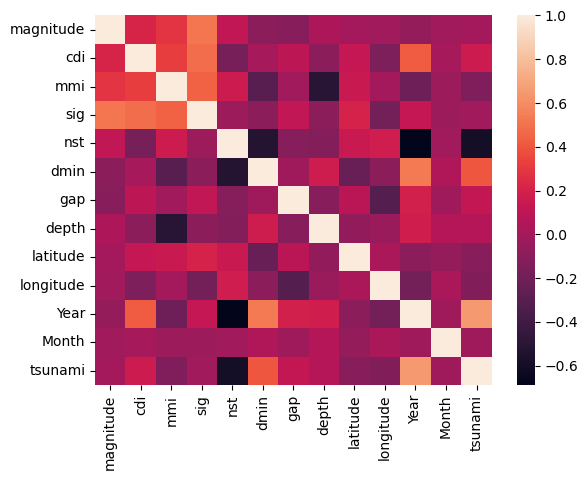

In [65]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr)


Text(0, 0.5, 'frequency of occurence')

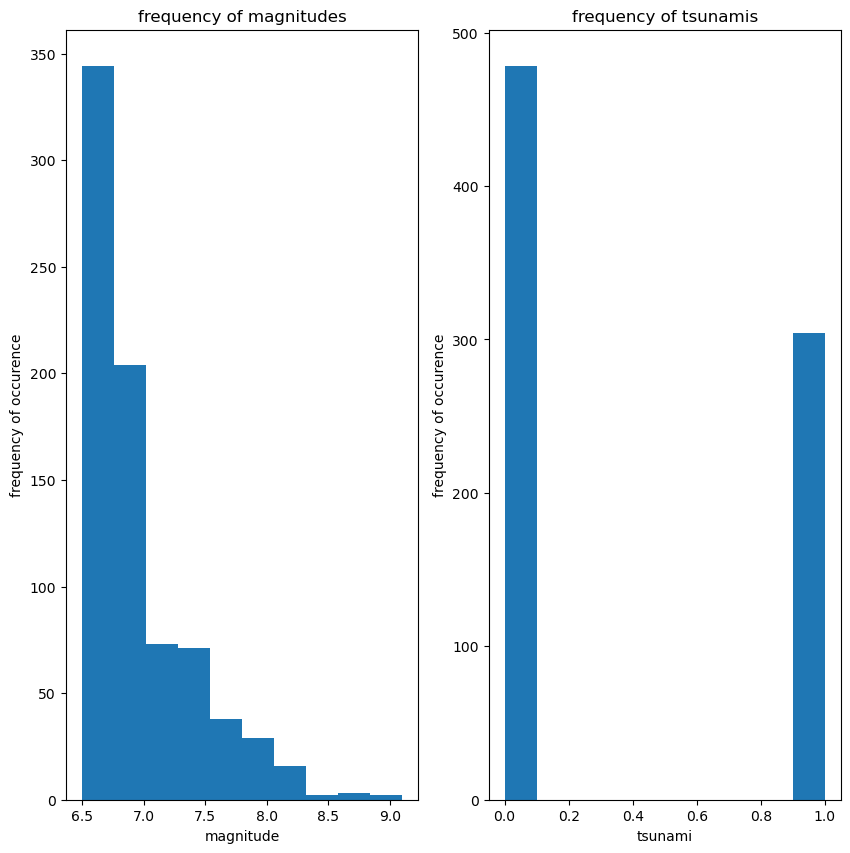

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax = ax.flatten()
ax[0].hist(data["magnitude"])
ax[0].set_title("frequency of magnitudes")
ax[0].set_xlabel("magnitude")
ax[0].set_ylabel("frequency of occurence")

ax[1].hist(data["tsunami"])
ax[1].set_title("frequency of tsunamis")
ax[1].set_xlabel("tsunami")
ax[1].set_ylabel("frequency of occurence")


<Axes: xlabel='tsunami', ylabel='count'>

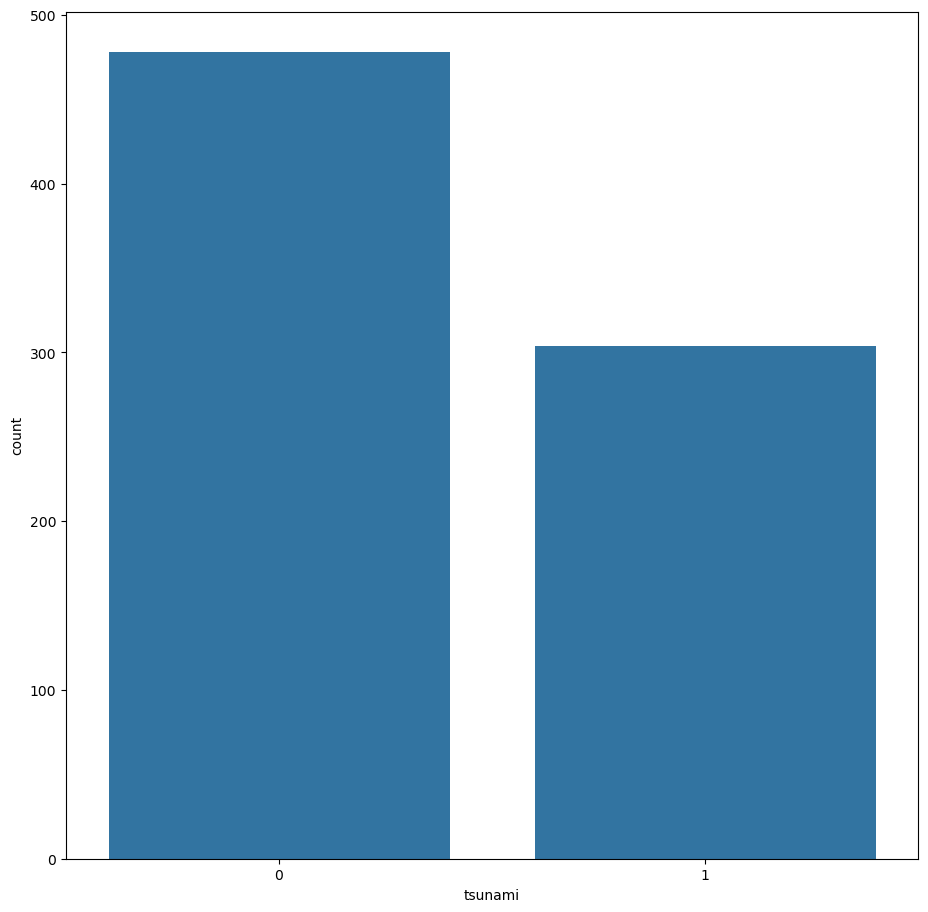

In [67]:
plt.figure(figsize=(11, 11))
sns.countplot(data=data, x="tsunami")

Text(0.5, 1.0, 'data before 2012')

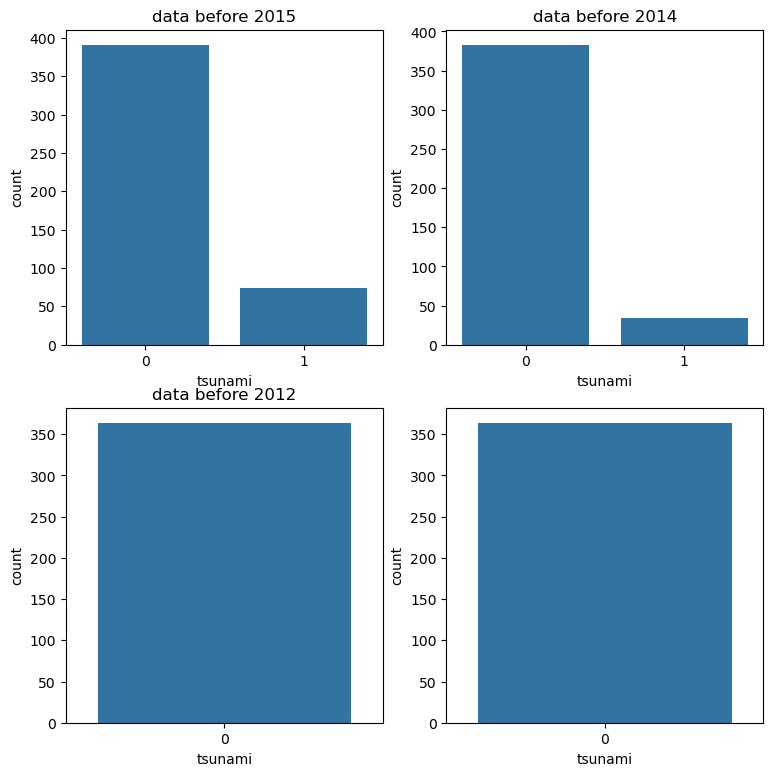

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(9,9))
ax = ax.flatten()
data_before_2015 = data[data['Year'] < 2015].copy()
sns.countplot(x='tsunami', data=data_before_2015, ax=ax[0])
ax[0].set_title("data before 2015")

data_before_2014 = data[data['Year'] < 2014].copy()
sns.countplot(x='tsunami', data=data_before_2014, ax=ax[1])
ax[1].set_title("data before 2014")

data_before_2013 = data[data['Year'] < 2013].copy()
sns.countplot(x='tsunami', data=data_before_2013, ax=ax[2])
ax[2].set_title("data before 2013")

data_before_2012 = data[data['Year'] < 2012].copy()
sns.countplot(x='tsunami', data=data_before_2013, ax=ax[3])
ax[2].set_title("data before 2012")




###### Take away
- This implies there were no tsunami before 2012 and hence those subset of the data
- This will lead to a model that is `biased` and cannot be used in real world 
- To build a more generalized model, all entries `<= 2012` can be removed
- `Smote` was used in this case because removing entries in year less than 2012 not only reduces the data but also doesn't solve the imbalance problem

### Modelling
- Data `preprocessing` pipeline
- model `pipeline`


In [69]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

### Evaluation matrix 
from sklearn.metrics import accuracy_score, f1_score, precision_score



<Axes: xlabel='tsunami', ylabel='count'>

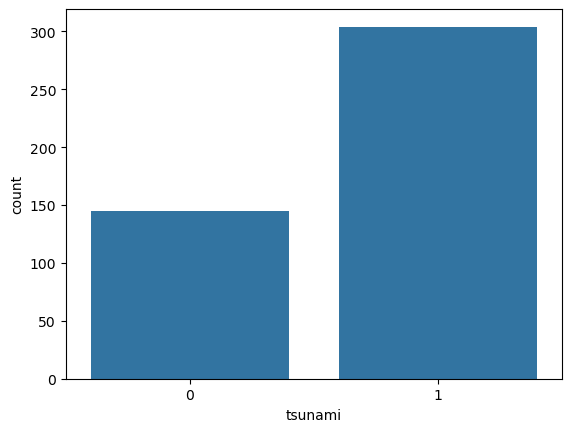

In [70]:
data_for_model = data[data['Year'] >= 2012].copy()
X = data_for_model.drop(["Year", "Month","tsunami"], axis=1)
Y = data_for_model["tsunami"]

sns.countplot(data_for_model,x="tsunami")


In [71]:
### data splitting

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle=True)


In [72]:
# preprocessing = Pipeline([
#    ,
   
# ])

models= {
            "SVC": SVC( 
            kernel="rbf",
            C=10,
            gamma="scale",
            probability=True,
            class_weight="balanced"
    ),
    
    "XGB" : XGBClassifier(
            n_estimators=400,
            learning_rate=0.03,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_lambda=1,
            reg_alpha=0.1,
            eval_metric="logloss",
            random_state=42
        ),
    "RF" : RandomForestClassifier(
        
            n_estimators=400,
            max_depth=None,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features="sqrt",
            class_weight="balanced",
            random_state=42,
             n_jobs=-1
    )
}

In [73]:
results = [
    { 
     
     "test" :       {
                            "model" : [],
                            "test_accuracy": [],
                            "test_precision": [],
                            "test_f1_score": [],
        
                        },
     "train" :       {
                            "model" : [],
                            "train_accuracy": [],
                            "train_precision": [],
                            "train_f1_score": [],
                            
         },
     
       "cross_val_scores" : []
       
        
    }
    
]

test_comparison_df = pd.DataFrame({
    "y_test_true": y_test
})

train_comparison_df = pd.DataFrame({
    "y_train_true": y_train
})


for name, model in models.items():
    
    model_pipeline = Pipeline(
        [
            ("scalar", StandardScaler()),
            ("smote", SMOTE(random_state=42, k_neighbors=3)),
            ("classifier", model ),
        ]
                
    )
    
    

    model_pipeline.fit(x_train, y_train)
    y_train_pred = model_pipeline.predict(x_train)
    y_test_pred = model_pipeline.predict(x_test)
    
    
    ## train Evaluation
    train_accuracies = accuracy_score(y_train, y_train_pred)
    train_precisions = precision_score(y_train, y_train_pred)
    train_f1_scores = f1_score (y_train, y_train_pred)
    
    ## Test Evaluation
    test_accuracies = accuracy_score(y_test, y_test_pred)
    test_precisions = precision_score(y_test, y_test_pred)
    test_f1_scores = f1_score (y_test, y_test_pred)
    
    cross_val_scores = cross_val_score(
        model_pipeline,
        x_train,
        y_train,
        cv=10,
        scoring="accuracy",
        
        
    )
    
    results[0]["test"]["model"].append(f'{name}')
    results[0]["test"]["test_accuracy"].append(np.round(test_accuracies, decimals=3))
    results[0]["test"]["test_precision"].append(np.round(test_precisions, decimals=3))
    results[0]["test"]["test_f1_score"].append(np.round(test_f1_scores, decimals=3))
    
   
    results[0]["train"]["model"].append(f'{name}')
    results[0]["train"]["train_accuracy"].append(np.round(train_accuracies, decimals=3))
    results[0]["train"]["train_precision"].append(np.round(train_precisions, decimals=3))
    results[0]["train"]["train_f1_score"].append(np.round(train_f1_scores, decimals=3))
    
    results[0]["cross_val_scores"].append(np.round(np.mean(cross_val_scores), decimals=3))
    
    test_comparison_df[f'{name}_test_pred'] = y_test_pred
    train_comparison_df[f'{name}_train_pred'] = y_train_pred

In [74]:
train_results = results[0]["train"]
test_results = results[0]["test"]
cross_val_scores = results[0]["cross_val_scores"]

test_results, train_results, cross_val_scores

({'model': ['SVC', 'XGB', 'RF'],
  'test_accuracy': [np.float64(0.704), np.float64(0.807), np.float64(0.822)],
  'test_precision': [np.float64(0.753), np.float64(0.832), np.float64(0.857)],
  'test_f1_score': [np.float64(0.785), np.float64(0.859), np.float64(0.867)]},
 {'model': ['SVC', 'XGB', 'RF'],
  'train_accuracy': [np.float64(0.943), np.float64(0.997), np.float64(0.994)],
  'train_precision': [np.float64(0.958), np.float64(0.995), np.float64(0.995)],
  'train_f1_score': [np.float64(0.958), np.float64(0.998), np.float64(0.995)]},
 [np.float64(0.735), np.float64(0.841), np.float64(0.831)])

In [75]:
test_results_df = pd.DataFrame(
    test_results
)

train_results_df = pd.DataFrame(
    train_results
)



<Figure size 1200x1500 with 0 Axes>

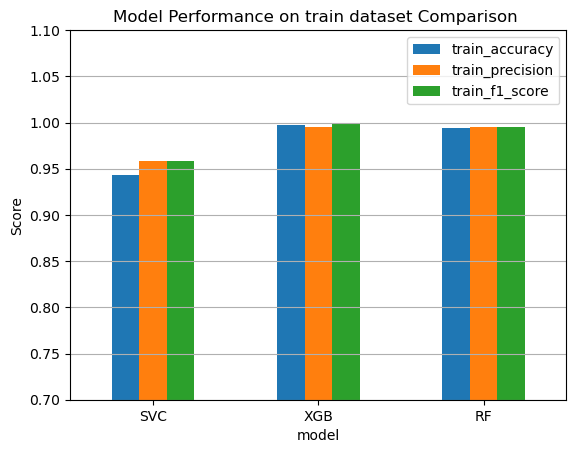

In [76]:
plt.figure(figsize=(12, 15))
train_results_df.set_index("model").plot(kind="bar")
plt.title("Model Performance on train dataset Comparison ")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.7, 1.1)
plt.grid(axis="y")

<Figure size 1000x1100 with 0 Axes>

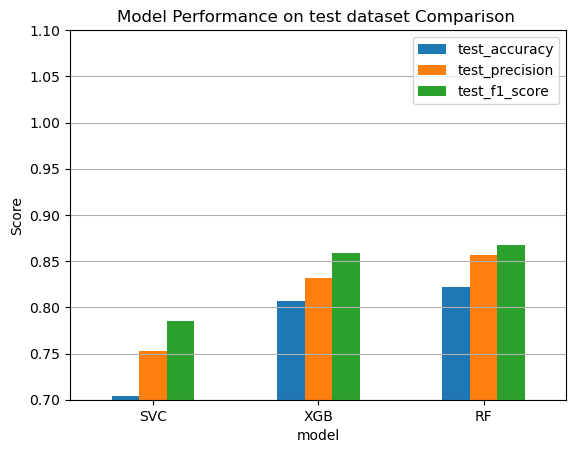

In [77]:
plt.figure(figsize=(10, 11))
test_results_df.set_index("model").plot(kind="bar",  )
plt.title("Model Performance on test dataset Comparison ")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.7, 1.1)
plt.grid(axis="y")

##### Hyperparameters Tunning
- `GridsearchCv` normally takes more time to complete but does an exhaustive search
- i could do this with the main loop but i just want to contrast the performance before and after tuning
- Because my laptop can not afford the computation of gridsearch, i am choosing randomsearchCv

In [78]:
from sklearn.model_selection import RandomizedSearchCV


In [79]:
tune_results = [
    { 
     
     "test" :       {
                            "model" : [],
                            "test_accuracy": [],
                            "test_precision": [],
                            "test_f1_score": [],
        
                        },
     "train" :       {
                            "model" : [],
                            "train_accuracy": [],
                            "train_precision": [],
                            "train_f1_score": [],
                            
         },
     
      
        
    }
    
]

param_search = {
    "SVC": {
        "classifier__C": [0.1, 1, 5, 10, 20, 50],
        "classifier__gamma": ["scale", 0.01, 0.05, 0.1, 0.5],
        "classifier__kernel": ["rbf"],
        "classifier__class_weight": ["balanced", None]
    },

   
    "XGB": {
        "classifier__n_estimators": [100, 200, 300, 400, 600],
        "classifier__learning_rate": [0.005, 0.01, 0.03, 0.05, 0.1],
        "classifier__max_depth": [3, 4, 5, 6, 8],
        "classifier__subsample": [0.6, 0.8, 1.0],
        "classifier__colsample_bytree": [0.6, 0.8, 1.0],
        "classifier__reg_lambda": [0.1, 0.5, 1, 2, 5],
        "classifier__reg_alpha": [0, 0.01, 0.1, 0.5],
        "classifier__min_child_weight": [1, 3, 5],
        "classifier__gamma": [0, 0.1, 0.3, 0.5],
        "classifier__scale_pos_weight": [1, 2, 3]
    },

   
    "RF": {
        "classifier__n_estimators": [200, 300, 400, 600],
        "classifier__max_depth": [None, 5, 10, 20],
        "classifier__min_samples_split": [2, 5, 10],
        "classifier__min_samples_leaf": [1, 2, 4],
        "classifier__max_features": ["sqrt", "log2", 0.5],
        "classifier__class_weight": ["balanced", "balanced_subsample", None]
    }
}


for name, model in models.items():
    tuning_pipeline = Pipeline(
       [
            ("scalar", StandardScaler()),
            ("smote", SMOTE(random_state=42)),
            ("classifier", model ),
        ]
                
    )
    
    random_search = RandomizedSearchCV(
    estimator=tuning_pipeline,
     param_distributions=param_search[name],
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
    
    )
    
    random_search.fit(x_train, y_train)
    best_model = random_search.best_estimator_
    
    train_pred = best_model.predict(x_train)
    test_pred = best_model.predict(x_test)
    
    
    tune_results[0]["test"]["model"].append(f'{name}')
    tune_results[0]["test"]["test_accuracy"].append(np.round(accuracy_score(y_test, test_pred), decimals=3))
    tune_results[0]["test"]["test_precision"].append(np.round(precision_score(y_test, test_pred), decimals=3))
    tune_results[0]["test"]["test_f1_score"].append(np.round(f1_score(y_test, test_pred), decimals=3))
    
   
    tune_results[0]["train"]["model"].append(f'{name}')
    tune_results[0]["train"]["train_accuracy"].append(np.round(accuracy_score(y_train, train_pred), decimals=3))
    tune_results[0]["train"]["train_precision"].append(np.round(precision_score(y_train, train_pred), decimals=3))
    tune_results[0]["train"]["train_f1_score"].append(np.round((f1_score(y_train, train_pred)), decimals=3))
    

    


    

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [80]:
tune_train_results = tune_results[0]["train"]
tune_test_results = tune_results[0]["test"]

tune_train_df = pd.DataFrame(tune_train_results)
tune_test_df = pd.DataFrame(tune_test_results)

tune_test_results, tune_train_results

({'model': ['SVC', 'XGB', 'RF'],
  'test_accuracy': [np.float64(0.719), np.float64(0.83), np.float64(0.822)],
  'test_precision': [np.float64(0.768), np.float64(0.837), np.float64(0.857)],
  'test_f1_score': [np.float64(0.793), np.float64(0.877), np.float64(0.867)]},
 {'model': ['SVC', 'XGB', 'RF'],
  'train_accuracy': [np.float64(0.803), np.float64(0.997), np.float64(1.0)],
  'train_precision': [np.float64(0.849), np.float64(0.995), np.float64(1.0)],
  'train_f1_score': [np.float64(0.857), np.float64(0.998), np.float64(1.0)]})

<Figure size 1000x1100 with 0 Axes>

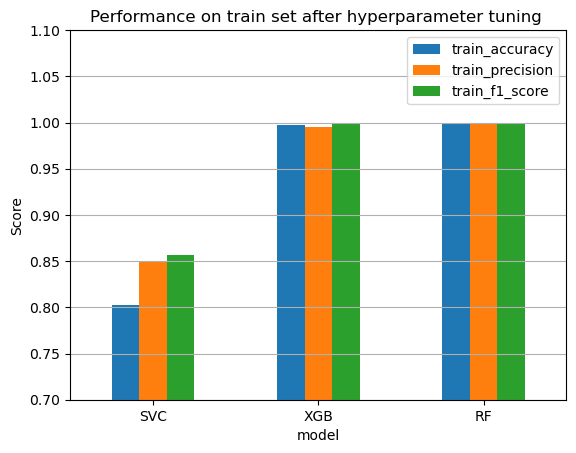

In [84]:
plt.figure(figsize=(10, 11))
tune_train_df.set_index("model").plot(kind="bar", )
plt.title("Performance on train set after hyperparameter tuning ")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.7, 1.1)
plt.grid(axis="y")

<Figure size 1000x1100 with 0 Axes>

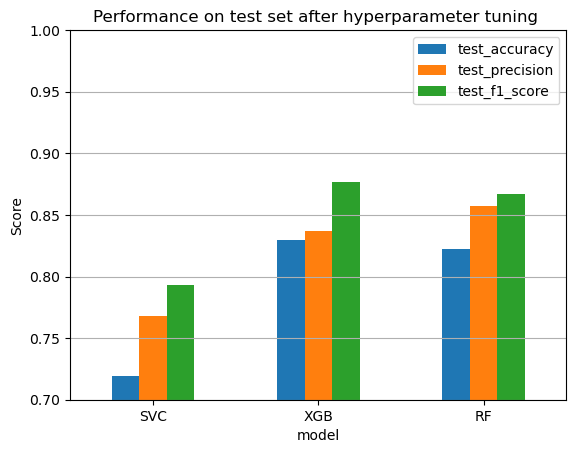

In [82]:
plt.figure(figsize=(10, 11))
tune_test_df.set_index("model").plot(kind="bar" )
plt.title("Performance on test set after hyperparameter tuning ")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0.7, 1)
plt.grid(axis="y")

###  This notebook shows how machine learning can be utilized in earthquake analysis
- it is clear that hyperparameter tuning make model more generalizing and reduces potential overfitting